<a href="https://colab.research.google.com/github/Ann924/assignment3/blob/main/al7gc_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

In [ ]:
!git clone https://www.github.com/Ann924/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 866.40 KiB | 3.46 MiB/s, done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

__Responses to Q1.1-Q1.2__:

In [ ]:
import pandas as pd

df = pd.read_csv("assignment3/data/car_data.csv")
print(df.shape)

(1000, 5)


Shape is 1000 rows/observations and 5 columns/attributes.

In [ ]:
df.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


No missing values (all are non-null). Need to clean Gender by converting it from an object to an int.

In [ ]:
df['Gender'] = (df['Gender']=='Female').astype(int)
df.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
5,846,1,47,33500,1
6,219,1,46,132500,1
7,588,0,42,64000,0
8,85,1,30,84500,0
9,465,0,41,52000,0


In [ ]:
y = df['Purchased'] # Create target variable vector
X = df.loc[:,['Age','AnnualSalary']] # Create feature matrix

__Responses to Q1.3-Q1.4:__

In [ ]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

__Responses to Q1.5:__

[44 45]


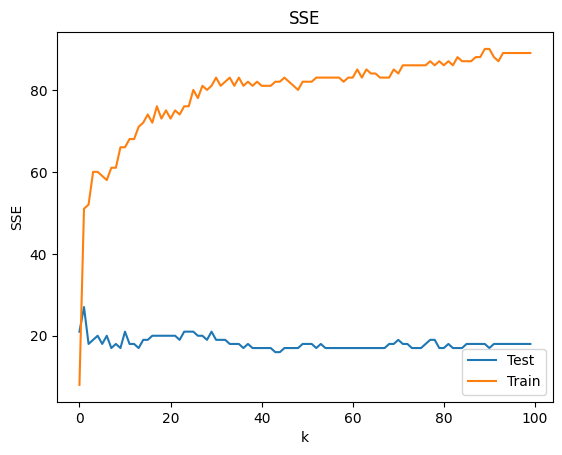

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Import the kNN regression tool

max_neighbors = 100

k_grid = np.arange(1,max_neighbors)
SSE_train = np.zeros(max_neighbors)
SSE_test = np.zeros(max_neighbors)
for k in range(max_neighbors):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,max_neighbors),SSE_test,label='Test') # Plot SSE by k
plt.plot(np.arange(0,max_neighbors),SSE_train,label='Train') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

The optimal number of $k$ is 44 or 45. We see that these values of $k$ minimize the SSE for the test data.

__Responses to Q1.6:__

In [ ]:
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=44)
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_predicted = fitted_model.predict(X_test)

confusion_matrix(y_test, y_predicted)

array([[106,  13],
       [  3,  78]])

In [ ]:
# Determine the correspondance of the actual value (0, 1) with the values of the confusion matrix
sum(y_test)

81

We can see here that the last row of the confusion matrix corresponds to where the actual output is 1

The model is quite accurate with 106 + 78 correct predictions. The 106 term refers to the number that the model predicted to be false (not purchased) while the actual value was false (not purchased). The 78 term refers to the number that the model predicted to be true (purchased) while the actual value was also true (purchased). The model predicts 3 cases a sale when a purchase was actually not made. The model predicts 13 cases of no sale when there was a purchase made.

__Responses to Q1.7:__

In [ ]:
# find the indices of the test data where the gender is female
female_indices = df.index[df['Gender']==1]
y_female_indices = X_test.index.isin(female_indices)

In [ ]:
female_y_test = [y_entry for y_entry, bool_mask in zip(y_test, y_female_indices) if bool_mask]
female_y_prediction = [y_entry for y_entry, bool_mask in zip(y_predicted, y_female_indices) if bool_mask]
confusion_matrix(female_y_test, female_y_prediction)

array([[57, 10],
       [ 1, 37]])

The confusion matrix for females

In [ ]:
male_y_test = [y_entry for y_entry, bool_mask in zip(y_test, y_female_indices) if not bool_mask]
male_y_prediction = [y_entry for y_entry, bool_mask in zip(y_predicted, y_female_indices) if not bool_mask]
confusion_matrix(male_y_test, male_y_prediction)

array([[49,  3],
       [ 2, 41]])

The confusion matrix for males

With the first confusion matrix representing classifications for women and the second confusion matrix representing classifcations for men, it appears that the model is more accurate for men rather than women. The proportion of incorrectly classified women is 11/105, which is nearly twice that of the proportion of incorrectly classified men (5/95).

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

__Responses to Q2.1-2.3:__

In [ ]:
# Read in data
df = pd.read_csv("assignment3/data/USA_cars_datasets.csv")

# Subset data to only look at relevant attributes
df = df[["price", "year", "mileage"]]
print(df.shape)
print(df.info())
df.head(10)

(2499, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB
None


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
5,5700,2018,45561
6,7300,2010,149050
7,13350,2017,23525
8,14600,2018,9371
9,5250,2017,63418


There are no null or missing values for these attributes.

In [ ]:
X = df

In [ ]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
y = X["price"]
X = X[["year", "mileage"]].apply(maxmin)

In [ ]:
X.head(10)

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537
5,0.957447,0.044758
6,0.787234,0.146424
7,0.936170,0.023110
8,0.957447,0.009206
9,0.936170,0.062301


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

__Responses to Q2.4-Q2.6:__

[100]


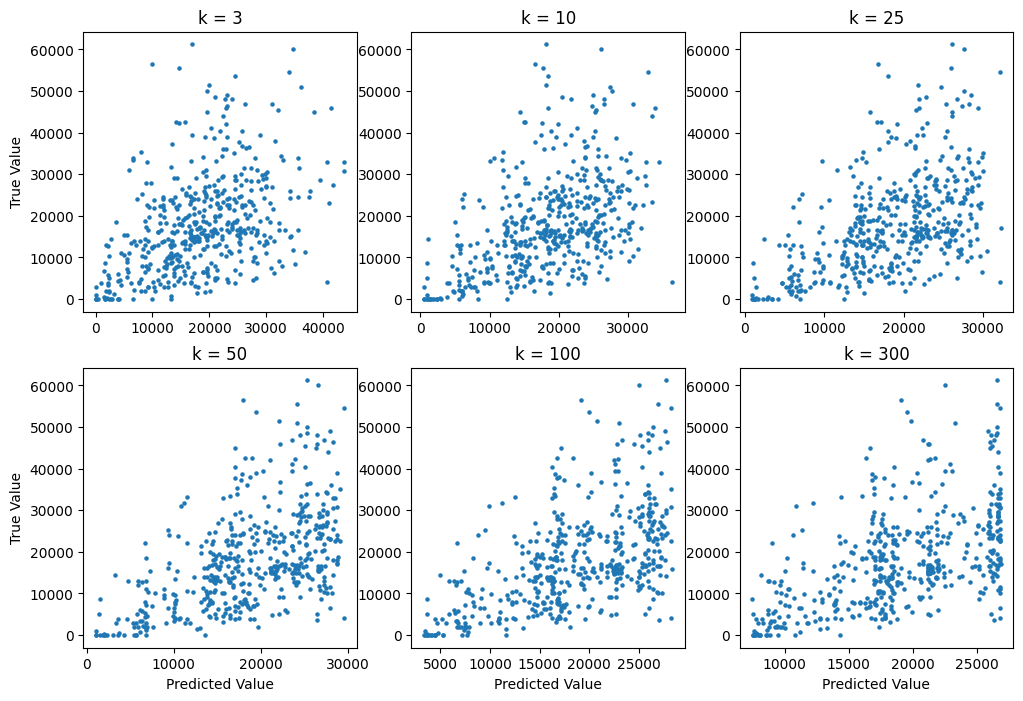

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool

fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(12, 8))

k_list = np.asarray([3,10,25,50,100,300])
SSE_train = np.zeros(len(k_list))
SSE_test = np.zeros(len(k_list))
for i, k in enumerate(k_list):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[i] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    axs[i//3][i%3].scatter(y_hat, y_test, 5)
    axs[i//3][i%3].set_title(f"k = {k}")

    if i%3 == 0:
      axs[i//3][i%3].set_ylabel("True Value")
    if i//3 == 1:
      axs[i//3][i%3].set_xlabel("Predicted Value")

    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[i] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_list[min_index] # Find the optimal value of k
print(k_star)

As $k$ increases, the scatter plot points appear to be less scattered and more grouped/clustered. The optimal $k$ is $k=100$, which yields the smallest SSE.

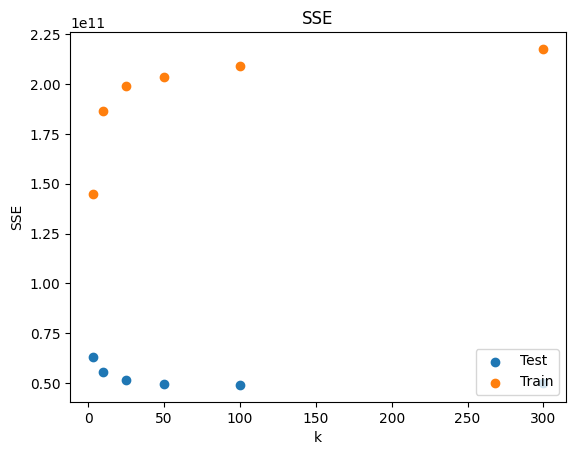

In [ ]:
plt.scatter(k_list, SSE_test,label='Test') # Plot SSE by k
plt.scatter(k_list, SSE_train,label='Train') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

The optimal $k$ is $k=100$. As k increases, the train SSE increases but the test SSE decreases. For large values of $k$, the changes in the train and test SSE appear to stagnate. The training dataset shows underfitting and the testing dataset shows overfitting for increases in $k$.

Text(0.5, 1.0, 'SSE')

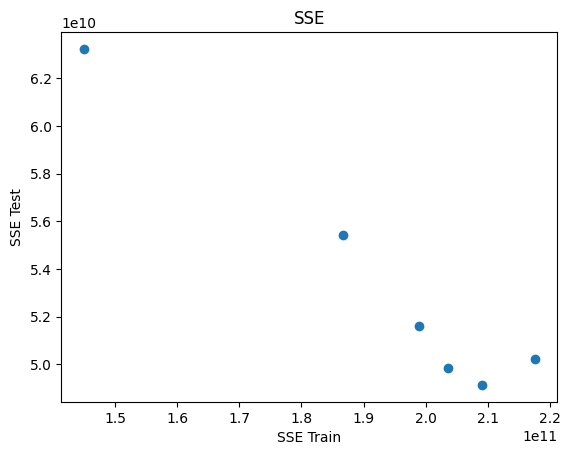

In [ ]:
plt.scatter(SSE_train,SSE_test) # Plot SSE by k
plt.xlabel("SSE Train")
plt.ylabel("SSE Test")
plt.title('SSE')

There appears to be a negative correlation between the SSE test and SSE train, indicating the potential of a tradeoff between the two types of accuracy.

Referring back to the phenomenon we observed with actual vs. predicted prices, we can see that the initial values of $k < 100$ were underfitting the data, with high variability in the locations of the scatter plot points. The correlation was weak between the predictions and the actual values. Meanwhile, for values of $k=300$, we see that the model if overfitting the data. The points on the scatterplot form vertical clusters/groupings, indicating that a wide range of observations (with different actual prices) are being predicted to be the same value since they are being grouped together. In this scenario $k$ is too large, resulting in overfitting of the data. Therefore, a balance between underfitting and overfitting would be $k=100$, which reduced the SSE.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

__Responses to Q5.1-Q5.2:__

In [237]:
# Read data into dataframe
df = pd.read_csv("assignment3/data/airbnb_hw.csv")
print(df.shape)

(30478, 13)


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [239]:
df = df[["Price", "Beds", "Number Of Reviews", "Review Scores Rating"]]
df.head(10)

,Price,Beds,Number Of Reviews,Review Scores Rating
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0
5,149,1.0,4,100.0
6,250,1.0,9,100.0
7,90,1.0,80,94.0
8,270,2.0,95,90.0
9,290,2.0,23,96.0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 30478 non-null  object 
 1   Beds                  30393 non-null  float64
 2   Number Of Reviews     30478 non-null  int64  
 3   Review Scores Rating  22155 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 952.6+ KB


Price and Number of Reviews does not need to be cleaned (no missing values). Only needs to be converted to integer/float. We lack the information to fill in missing Beds information. Beds can also be converted to an integer (since we cannot have a partial bed)

In [241]:
df['Beds'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

In [242]:
# Only extract non-null rows
df = df[df['Beds'].notna() & df['Review Scores Rating'].notna()]

df.loc[:,'Price'] = df.loc[:,'Price'].apply(lambda x: "".join(x.split(','))).astype(float)
df.loc[:, 'Beds'] = df.loc[:, 'Beds'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22111 entries, 4 to 30409
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 22111 non-null  float64
 1   Beds                  22111 non-null  int64  
 2   Number Of Reviews     22111 non-null  int64  
 3   Review Scores Rating  22111 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 863.7 KB


<ipython-input-242-9ccfb322ffb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Price'] = df.loc[:,'Price'].apply(lambda x: "".join(x.split(','))).astype(float)
<ipython-input-242-9ccfb322ffb4>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Price'] = df.loc[:,'Price'].apply(lambda x: "".join(x.split(','))).astype(float)
<ipython-input-242-9ccfb322ffb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [271]:
X = df[["Beds", "Number Of Reviews", "Review Scores Rating"]]

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

X = X.apply(maxmin) # Normalize the data

__Responses to Q5.3-Q5.5:__

In [272]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(X) # Fit the model
print(model.inertia_)

X_analysis = X.reindex()
X_analysis['cluster'] = model.labels_
X_analysis['price'] = df['Price']

print(X_analysis.groupby('cluster').mean()['price'], "\n")
X_analysis.groupby('cluster').describe()
# print information for each cluster

152.9613993655849
cluster
0    293.440688
1    152.199600
2    131.671174
3    133.311475
4    133.561014
5    141.703177
Name: price, dtype: float64 



Beds                                                              \
           count      mean       std     min     25%     50%     75%     max   
cluster                                                                        
0         1627.0  0.261870  0.103909  0.1875  0.1875  0.2500  0.3125  1.0000   
1        10491.0  0.080557  0.032101  0.0625  0.0625  0.0625  0.1250  0.1875   
2         5547.0  0.084618  0.035983  0.0000  0.0625  0.0625  0.1250  0.2500   
3          793.0  0.098124  0.055315  0.0625  0.0625  0.0625  0.1250  0.4375   
4          631.0  0.103605  0.067096  0.0625  0.0625  0.0625  0.1250  0.7500   
5         3022.0  0.089159  0.041519  0.0625  0.0625  0.0625  0.1250  0.2500   

        Number Of Reviews            ... Review Scores Rating          \
                    count      mean  ...                  75%     max   
cluster                              ...                                
0                  1627.0  0.051031  ...               0.9500  1.0000   
1                 10491.0  0.023198  ...               1.0000  1.0000   
2                  5547.0  0.028759  ...               0.8750  0.8875   
3                   793.0  0.421974  ...               0.9375  1.0000   
4                   631.0  0.013434  ...               0.6125  0.6500   
5                  3022.0  0.169334  ...               0.9375  1.0000   

           price                                                               
           count        mean         std   min     25%    50%    75%      max  
cluster                                                                        
0         1627.0  293.440688  262.877909  27.0  150.00  229.0  350.0   4500.0  
1        10491.0  152.199600  147.277659  10.0   85.00  130.0  190.0  10000.0  
2         5547.0  131.671174  102.821180  20.0   75.00  110.0  169.0   5000.0  
3          793.0  133.311475   83.104413  27.0   80.00  110.0  169.0    875.0  
4          631.0  133.561014  215.675540  25.0   65.00   99.0  152.5   5000.0  
5         3022.0  141.703177   84.214663  22.0   87.25  125.0  175.0   1000.0  

[6 rows x 32 columns]

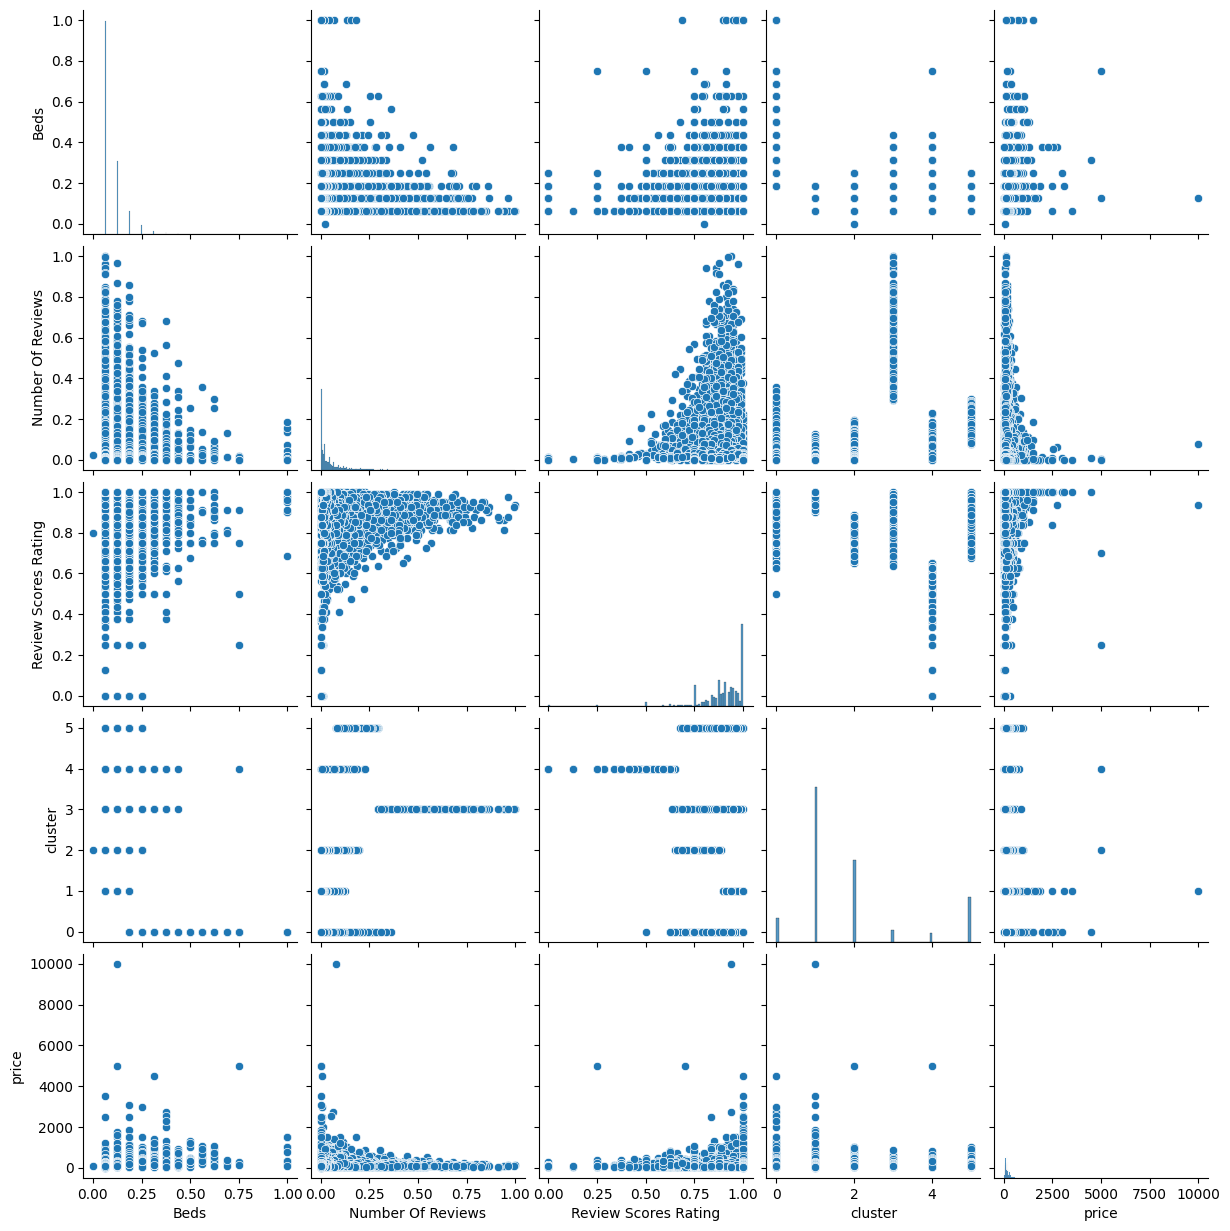

In [273]:
import seaborn as sns
sns.pairplot(X_analysis)

Cluster 0 and 1 have the highest rental prices.

__Responses to Q5.6:__

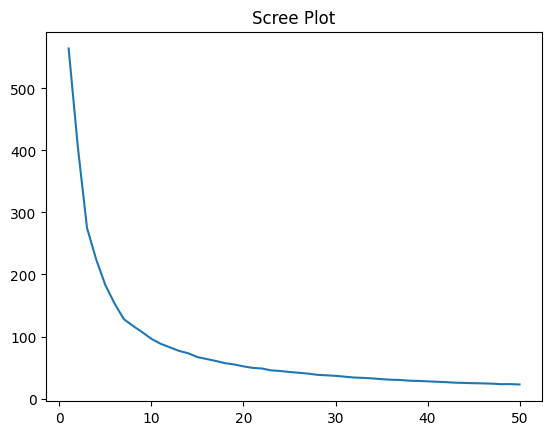

In [266]:
max_k = 50
k_grid = np.arange(1, max_k+1)
SSE = np.zeros(max_k) # We'll store the training error here
for k in range(max_k):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
  model = model.fit(X) # Fit the model
  SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

Text(0.5, 1.0, 'Scree Plot')

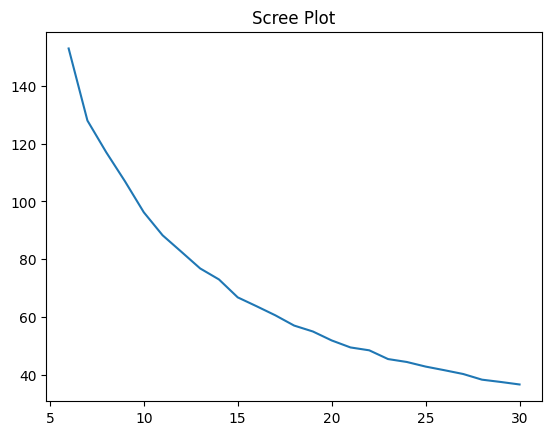

In [268]:
sns.lineplot(x=k_grid[5:30], y=SSE[5:30]).set_title('Scree Plot') # Create scree plot

It appears the elbow of the plot may occur around $k=15$.

In [269]:
opt_k = 15
model = KMeans(n_clusters=opt_k, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(X) # Fit the model
print(model.inertia_)

X_analysis = X.reindex()
X_analysis['cluster'] = model.labels_
X_analysis['price'] = df['Price']

print(X_analysis.groupby('cluster').mean()['price'], "\n")
X_analysis.groupby('cluster').describe()
# print information for each cluster

66.7649494277892
cluster
0     131.834805
1     119.873257
2     125.000000
3     230.111801
4     145.866514
5     121.774668
6     134.905933
7     102.010870
8     217.328153
9     195.863987
10    584.789474
11    145.470665
12    131.420160
13    124.400771
14    337.273775
Name: price, dtype: float64 



Beds                                                              \
          count      mean       std     min     25%     50%     75%     max   
cluster                                                                       
0        5321.0  0.062500  0.000000  0.0625  0.0625  0.0625  0.0625  0.0625   
1        3298.0  0.062500  0.000000  0.0625  0.0625  0.0625  0.0625  0.0625   
2         166.0  0.099774  0.060763  0.0625  0.0625  0.0625  0.1250  0.3750   
3         483.0  0.232402  0.058043  0.1875  0.1875  0.1875  0.2500  0.4375   
4        1311.0  0.094537  0.047528  0.0625  0.0625  0.0625  0.1250  0.2500   
5        2108.0  0.078540  0.027373  0.0000  0.0625  0.0625  0.1250  0.1250   
6         691.0  0.097142  0.053771  0.0625  0.0625  0.0625  0.1250  0.4375   
7          92.0  0.089674  0.049295  0.0625  0.0625  0.0625  0.1250  0.2500   
8        2252.0  0.138210  0.025523  0.1250  0.1250  0.1250  0.1250  0.1875   
9        1816.0  0.142174  0.027908  0.1250  0.1250  0.1250  0.1875  0.1875   
10         57.0  0.657895  0.174435  0.5000  0.5000  0.6250  0.6875  1.0000   
11       2301.0  0.071491  0.022016  0.0625  0.0625  0.0625  0.0625  0.1875   
12       1002.0  0.093251  0.041739  0.0625  0.0625  0.0625  0.1250  0.2500   
13        519.0  0.099229  0.056262  0.0625  0.0625  0.0625  0.1250  0.3750   
14        694.0  0.294579  0.055777  0.2500  0.2500  0.2500  0.3125  0.4375   

        Number Of Reviews            ... Review Scores Rating           price  \
                    count      mean  ...                  75%     max   count   
cluster                              ...                                        
0                  5321.0  0.012319  ...               1.0000  1.0000  5321.0   
1                  3298.0  0.025853  ...               0.9125  0.9250  3298.0   
2                   166.0  0.622270  ...               0.9375  0.9875   166.0   
3                   483.0  0.043139  ...               0.7875  0.8375   483.0   
4                  1311.0  0.207204  ...               0.9500  1.0000  1311.0   
5                  2108.0  0.018312  ...               0.7750  0.8125  2108.0   
6                   691.0  0.361274  ...               0.9375  1.0000   691.0   
7                    92.0  0.001868  ...               0.2500  0.3375    92.0   
8                  2252.0  0.018048  ...               1.0000  1.0000  2252.0   
9                  1816.0  0.037152  ...               0.9125  0.9500  1816.0   
10                   57.0  0.060170  ...               0.9625  1.0000    57.0   
11                 2301.0  0.089655  ...               0.9625  1.0000  2301.0   
12                 1002.0  0.144566  ...               0.8625  0.8875  1002.0   
13                  519.0  0.014315  ...               0.6250  0.6500   519.0   
14                  694.0  0.051338  ...               1.0000  1.0000   694.0   

                                                                      
               mean         std   min    25%    50%     75%      max  
cluster                                                               
0        131.834805   92.022035  10.0   78.0  115.0  170.00   3500.0  
1        119.873257   62.810713  24.0   75.0  100.0  150.00    855.0  
2        125.000000   69.406401  33.0   79.0  100.0  163.75    550.0  
3        230.111801  143.396644  30.0  140.0  200.0  299.00   1000.0  
4        145.866514   88.026989  30.0   89.5  125.0  175.50    850.0  
5        121.774668  127.506527  20.0   70.0  100.0  150.00   5000.0  
6        134.905933   84.319569  27.0   80.0  110.0  166.00    875.0  
7        102.010870   67.796965  30.0   60.0   79.5  126.25    390.0  
8        217.328153  164.648470  26.0  129.0  180.0  250.00   3100.0  
9        195.863987  128.957681  36.0  120.0  175.0  240.00   2500.0  
10       584.789474  698.424496  55.0  250.0  350.0  750.00   5000.0  
11       145.470665  220.142955  29.0   85.0  125.0  180.00  10000.0  
12       131.420160   78.779096  22.0   75.0  115.0  165.00    8

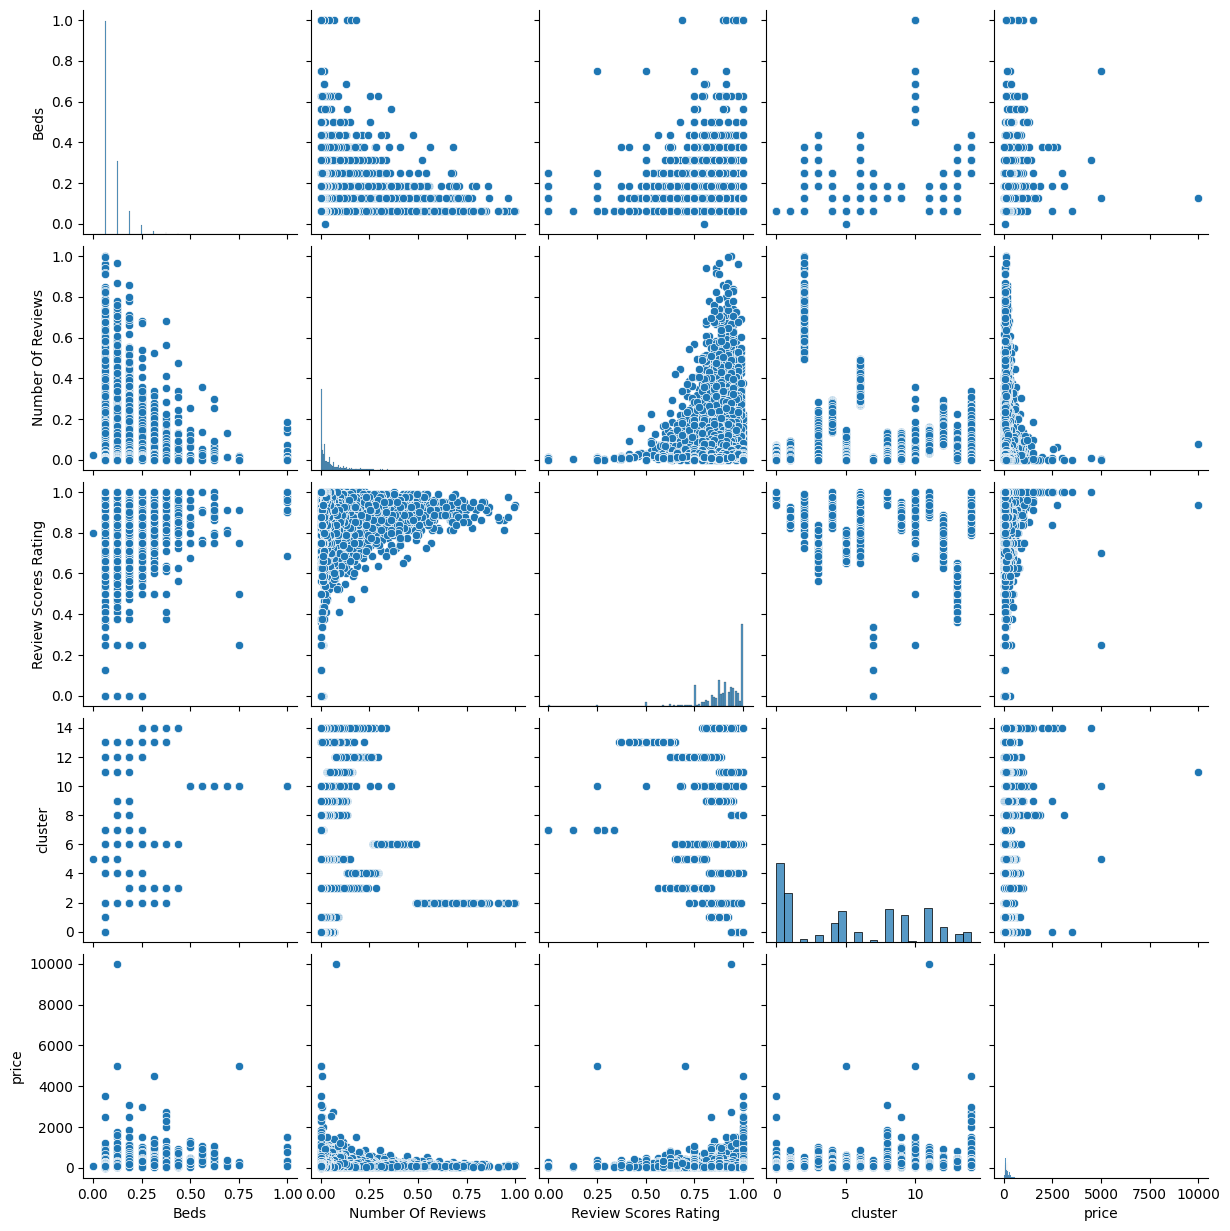

In [270]:
sns.pairplot(X_analysis)

From our analysis, we observe that clusters 10 and 14 have the highest rental prices.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?